# **Libraries**

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

import xgboost as xgb
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')
color_pal = sns.color_palette()

plt.rcParams['figure.figsize'] = 15, 5

# **Data**

In [137]:
data = pd.read_csv("monthly_milk_production.csv", index_col = "Date", parse_dates = True)
data.index.freq = "MS"
data

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 1962-01 to 1975-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6+ KB


In [134]:
data["fecha reporte web"] = pd.to_datetime(data["fecha reporte web"], )
data.info()

KeyError: 'fecha reporte web'

In [ ]:
df = pd.DataFrame(data["fecha reporte web"].value_counts()).sort_index()
df.head()

,count
fecha reporte web,
2020-03-06,1
2020-03-09,2
2020-03-11,6
2020-03-12,5
2020-03-13,5


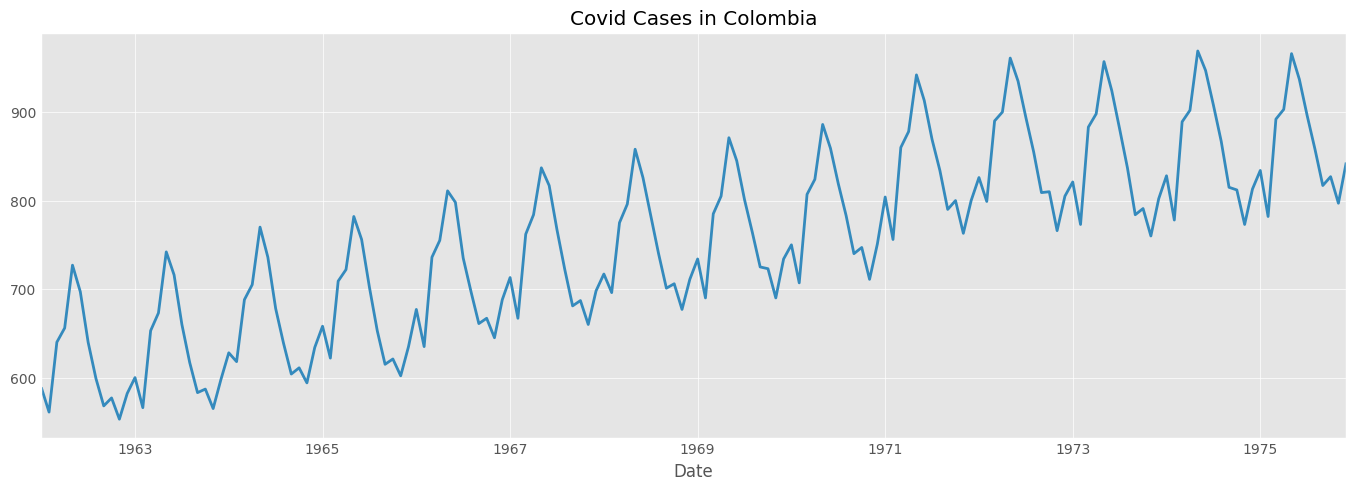

In [138]:
data.plot(title='Covid Cases in Colombia',
        color = color_pal[1],
        legend = False)

plt.show()

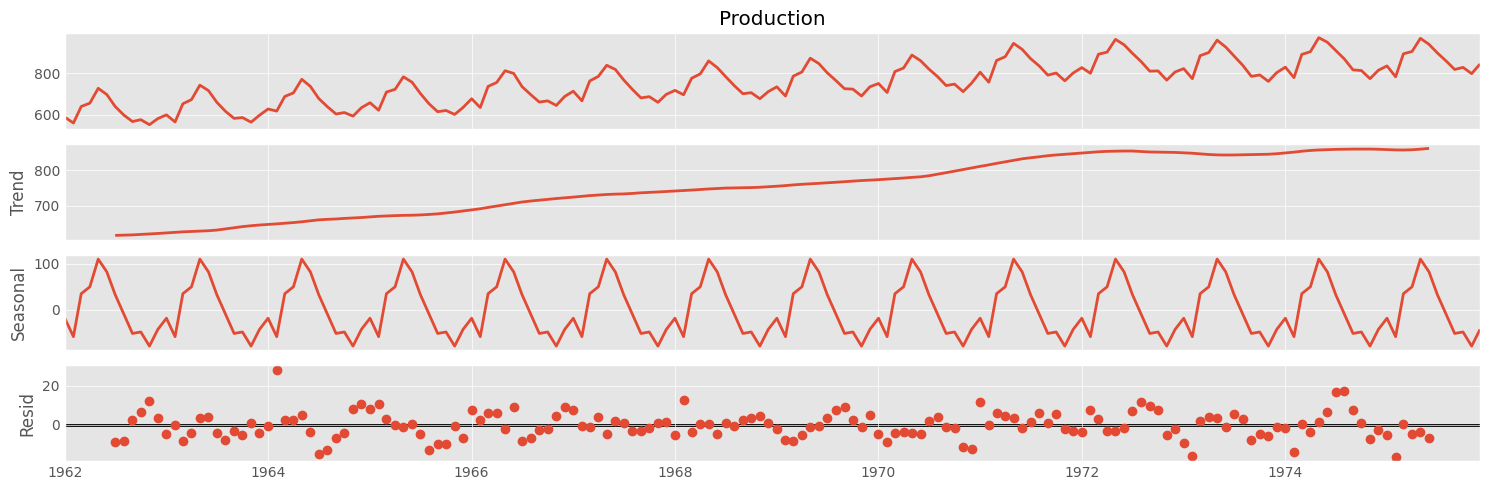

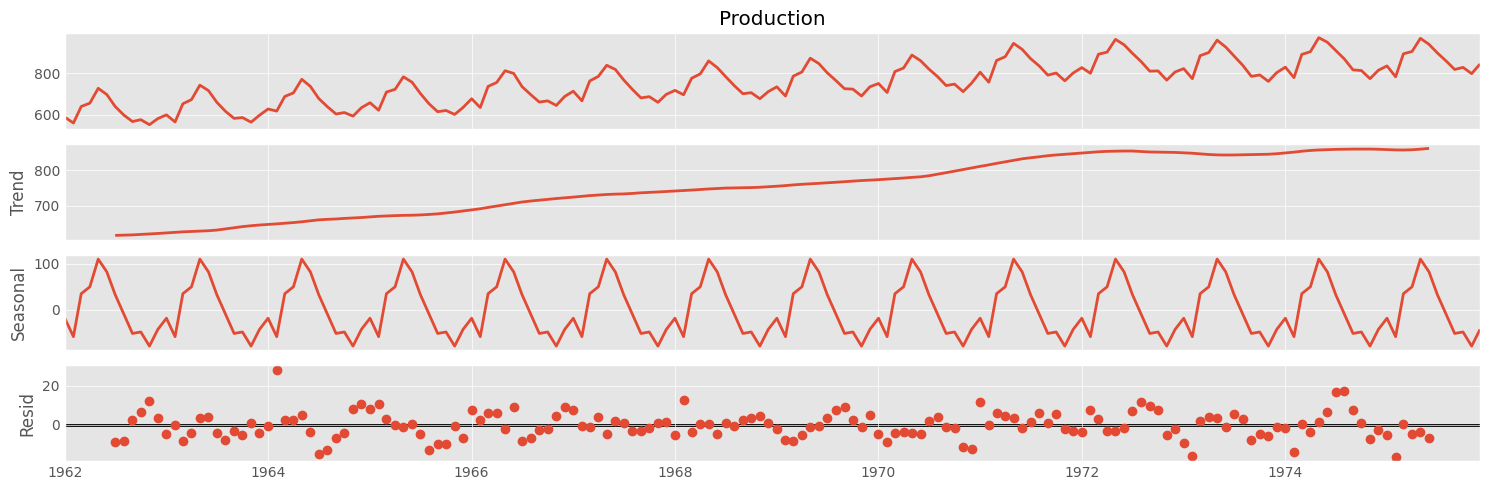

In [139]:
res = seasonal_decompose(data["Production"])
res.plot()

In [130]:
data.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

Given pandas dataframe name
2020-01-01     0.993428
2020-01-02     2.323471
2020-01-03     5.825504
2020-01-04     8.346060
2020-01-05     4.261820
2020-01-06     2.531726
2020-01-07     3.758426
2020-01-08    -0.265131
2020-01-09    -4.469076
2020-01-10    -3.014880
2020-01-11    -4.256962
2020-01-12    -2.331460
2020-01-13     1.683925
2020-01-14    -0.026560
2020-01-15     2.280291
2020-01-16     5.375425
2020-01-17     3.904465
2020-01-18     4.828495
2020-01-19    -0.016048
2020-01-20    -3.424607
2020-01-21     0.601171
2020-01-22    -3.351553
2020-01-23    -1.995071
2020-01-24    -3.049496
2020-01-25     1.311235
2020-01-26     5.221845
2020-01-27     4.628140
2020-01-28     8.451396
2020-01-29     5.928850
2020-01-30     4.816613
2020-01-31     1.796587
2020-02-01     4.304556
2020-02-02    -1.157121
2020-02-03    -3.815422
2020-02-04     0.714963
2020-02-05    -1.441687
2020-02-06     4.017727
2020-02-07     2.280660
2020-02-08     5.473755
2020-02-09     9.293722
2020-02-10  

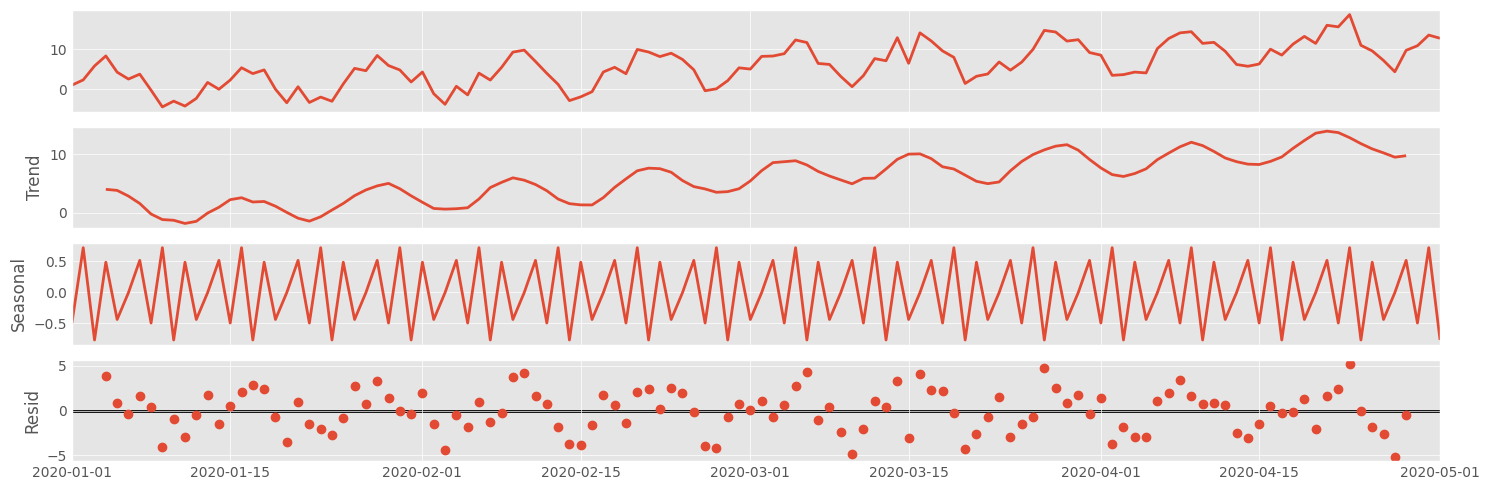

In [129]:
def print_pandas(dataframe_given):
    with pd.option_context('display.max_rows', None,'display.max_columns', None, 'expand_frame_repr', False):
        print("Given pandas dataframe name")
        print(dataframe_given)


np.random.seed(42)
time = np.arange(122)
trend = time * 0.1
seasonal = 5 * np.sin(time * 2 * np.pi / 12)
residual = np.random.randn(time.shape[0]) * 2
data = trend + seasonal + residual
date_rng = pd.date_range(start='2020-01-01', end='2020-05-01', freq='D')
ts = pd.Series(data, date_rng)

print_pandas(ts)

result = seasonal_decompose(ts, model='additive')

result.plot()
plt.show()

# **Train & Test**

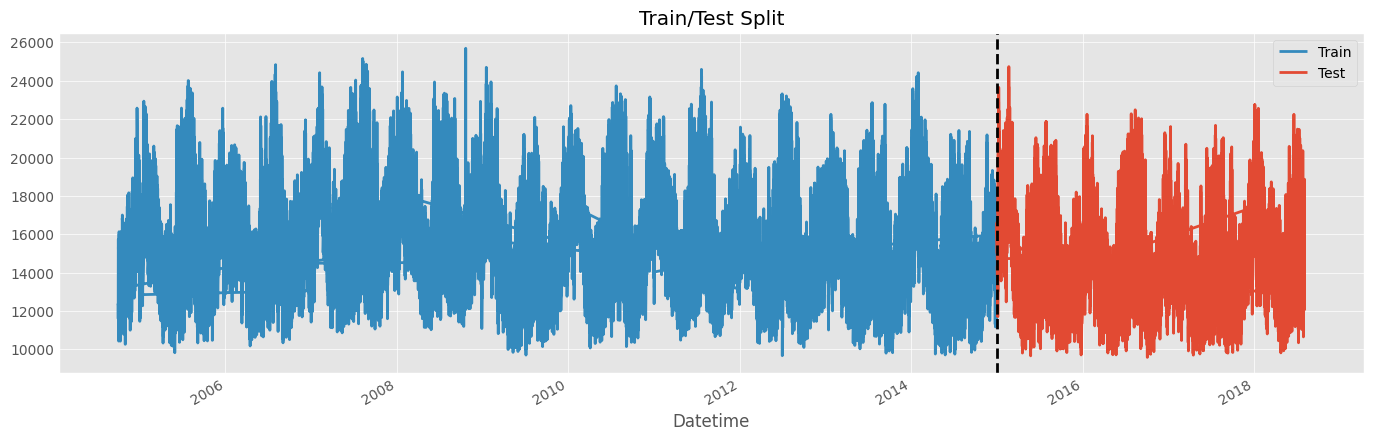

In [67]:
train = df[df.index < "01-01-2015"]
test = df[df.index >= "01-01-2015"]

fig, ax = plt.subplots()

train.plot(ax = ax , label = "Training Set", color = color_pal[1])
test.plot(ax = ax, label = "Test Set", color = color_pal[0])

ax.axvline("01-01-2015", color = "black", ls = "--")
plt.title("Train/Test Split") 
plt.legend(["Train", "Test"])

plt.show()

- https://www.youtube.com/watch?v=S8tpSG6Q2H0
- https://www.youtube.com/watch?v=vV12dGe_Fho&t=43s